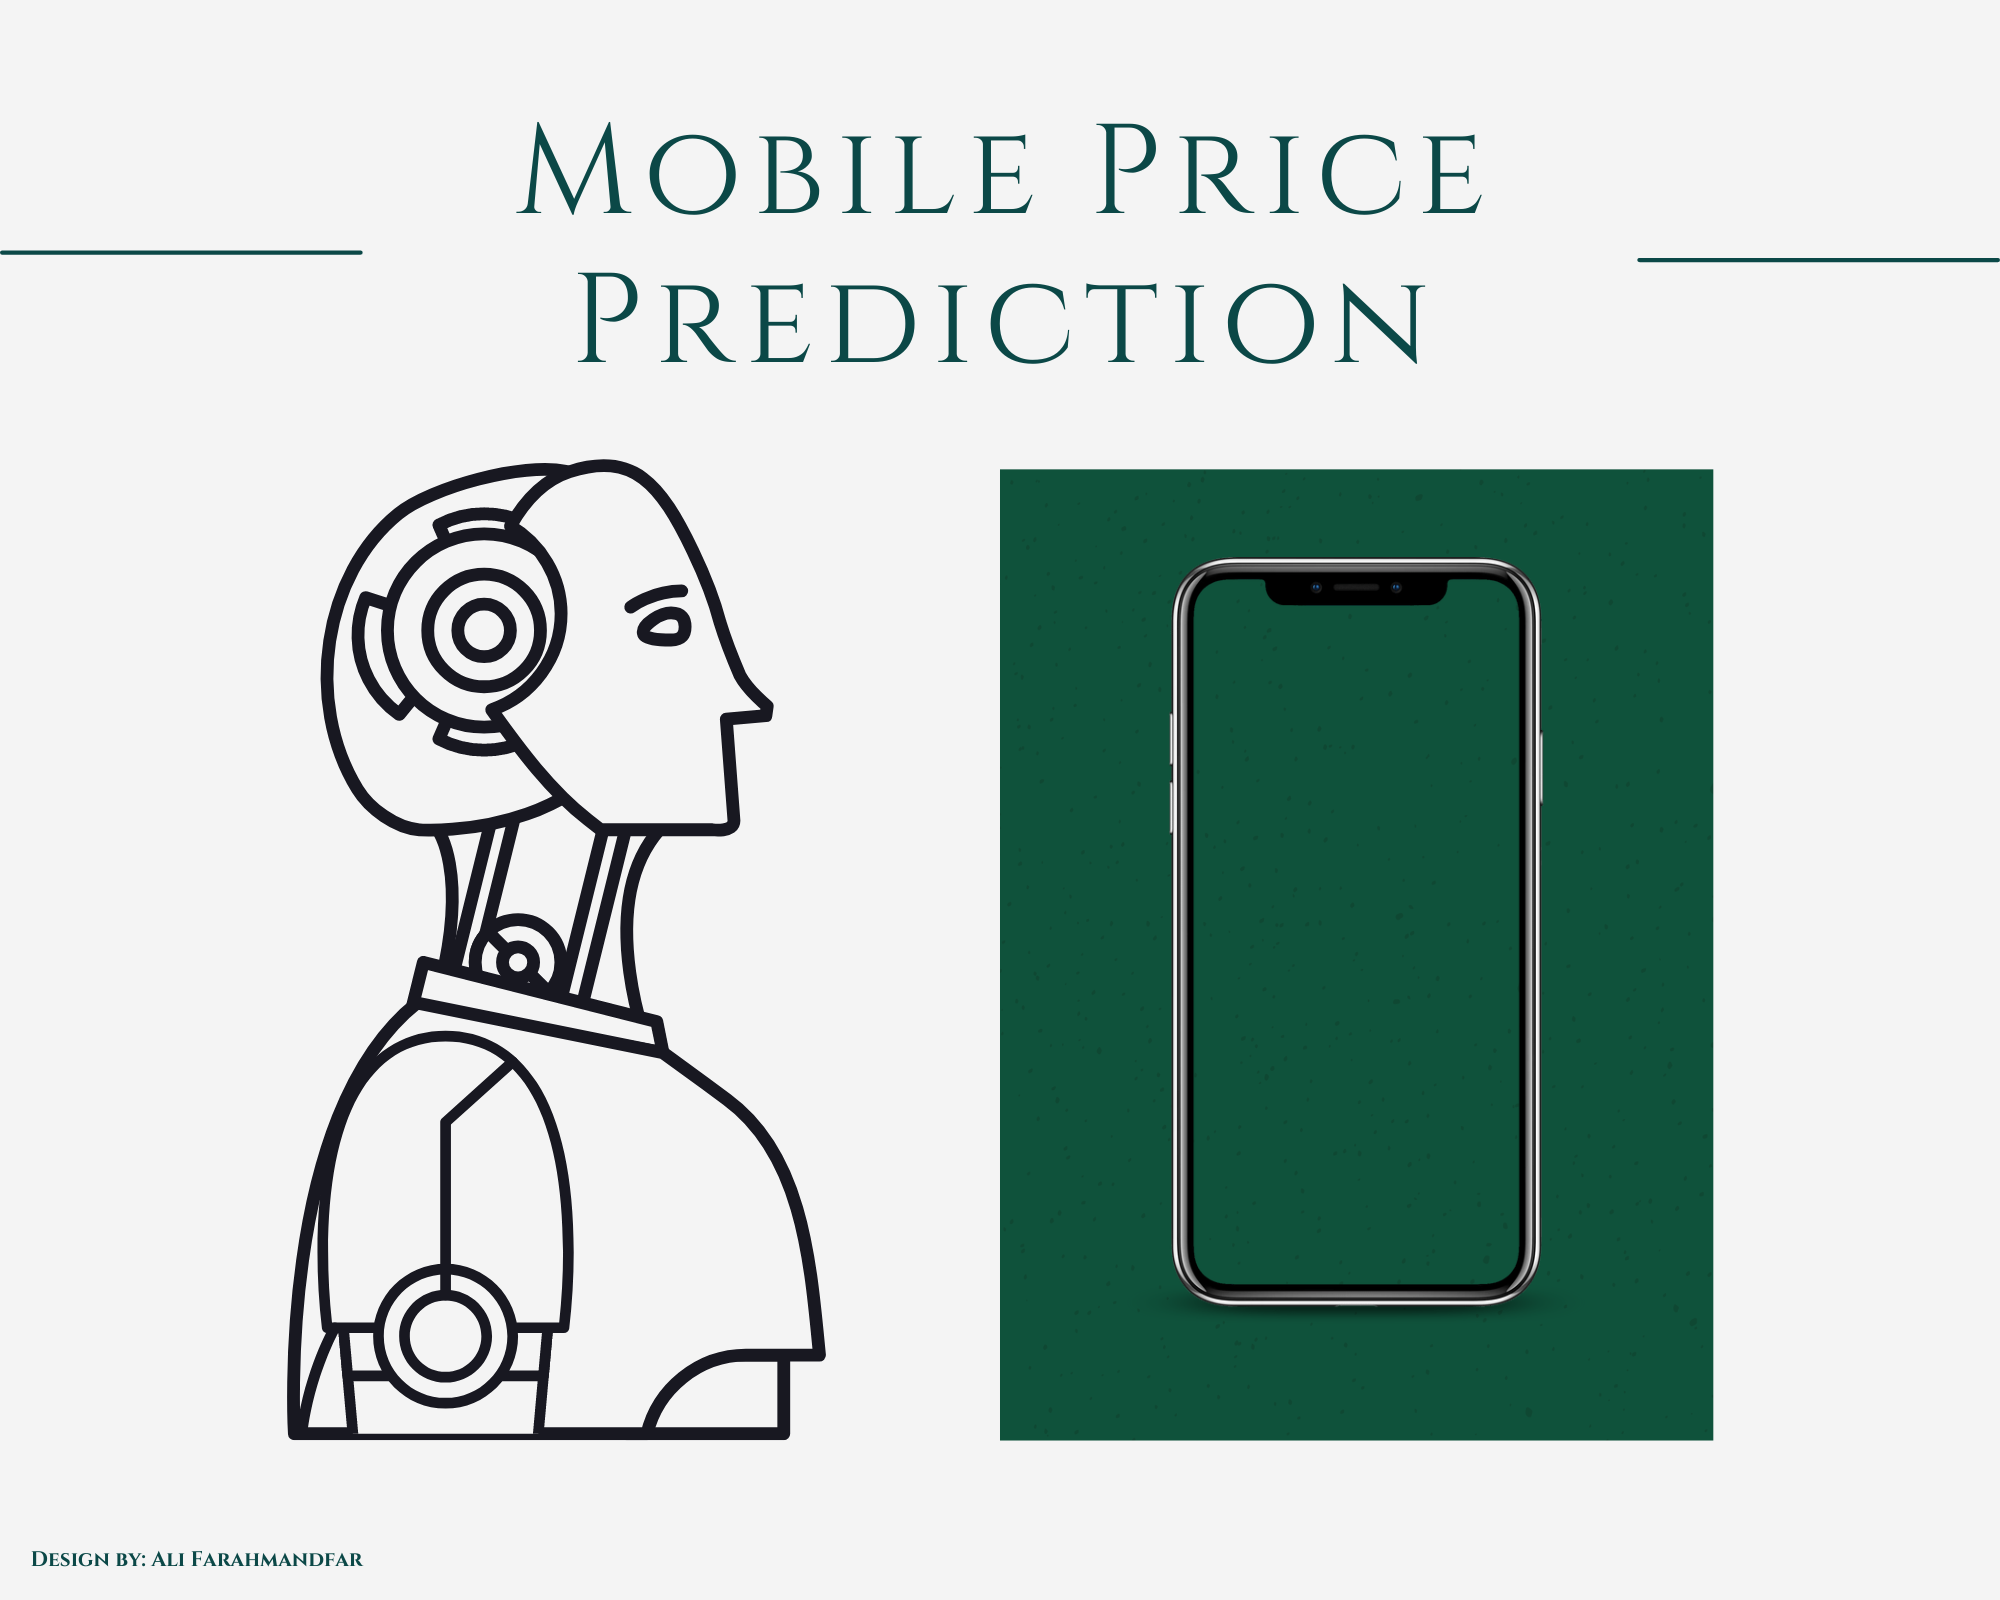

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Data</p> 

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not | 
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of **0: (Low Cost**), **1: (Medium Cost**), **2: (High Cost**), and **3: (Very High Cost**) |

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p>

In [ ]:
# Data
import pandas as pd
import numpy as np

# Pandas Profiling
from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#color pallet and theme
import matplotlib.colors

colors = ["#e9f5f0","#d5eae9","#2e5551",'#468e71','#4d9b68','#59ae8c']
colors2 = ["#2e5551",'#468e71','#4d9b68','#59ae8c', "#e9f5f0","#d5eae9"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [ ]:
Data = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [ ]:
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [ ]:
# Preview the dataset (train)
Df = pd.DataFrame(Data)
Df.head(5)

In [ ]:
# Preview the dataset (test)
Df_test = pd.DataFrame(test)
Df_test.head(5)

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.2. Discover Data (train)</p>

In [ ]:
# View dimensions of dataset   
rows, col = Df.shape
print ("Dimensions of dataset: {}" . format (Df.shape))
print ('Rows:', rows, '\nColumns:', col)

In [ ]:
# Statistical details
Df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

In [ ]:
# Number of uniqe elements in each columns
unique = Df.nunique()
unique.to_frame().T

In [ ]:
# Information about the dataframe
Df.info()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.3. Discover Data (test)</p>

In [ ]:
# View dimensions of dataset   
rows, col = Df_test.shape
print ("Dimensions of dataset: {}" . format (Df_test.shape))
print ('Rows:', rows,'\nColumns:', col)

In [ ]:
# Statistical details
Df_test.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

In [ ]:
# Information about the dataframe
Df_test.info()

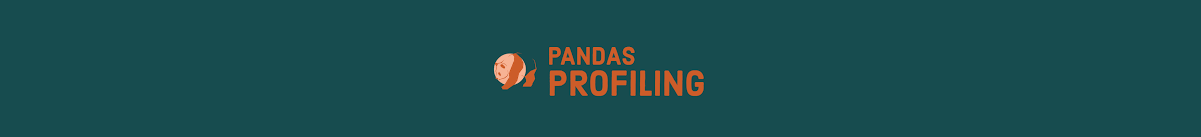

#### 🎄Train Data

In [ ]:
#profile_train = ProfileReport(Df, title="Pandas Profiling Report on train data", explorative=True)

In [ ]:
#profile_train.to_widgets()

#### 🎄Test Data

In [ ]:
#profile_test = ProfileReport(Df_test, title="Pandas Profiling Report on train data", explorative=True)

In [ ]:
#profile_test.to_widgets()

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Preprocessing</p>

#### 🎄Mobile Depth (Cm):

In [ ]:
Df.m_dep.describe()

#### 🎄Pixel Resolution (Height):

In [ ]:
Df.px_height.describe()

#### 🎄Screen Width (Cm):

In [ ]:
Df.sc_w.describe()

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4. Data Cleaning</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Mobile Depth</p>

#### 🎄Train Data

In [ ]:
# Find values below 0.5 cm
below_threshold = Df["m_dep"][Df["m_dep"] < 0.5]

# Count the number of values below 0.5 cm
num_below_threshold = len(below_threshold)

# Print the number of values below 0.5 cm
print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold)

In [ ]:
# Replace values below 0.5 cm with 0.5 cm
Df["m_dep"][Df["m_dep"] < 0.5] = 0.5

In [ ]:
Df.m_dep.describe()

#### 🎄Test Data

In [ ]:
# Find values below 0.5 cm
below_threshold3 = Df_test["m_dep"][Df_test["m_dep"] < 0.5]

# Count the number of values below 0.5 cm
num_below_threshold3 = len(below_threshold3)

# Print the number of values below 0.5 cm
print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold3)

In [ ]:
# Replace values below 0.5 cm with 0.5 cm
Df_test["m_dep"][Df_test["m_dep"] < 0.5] = 0.5

In [ ]:
Df_test.m_dep.describe()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Pixel Resolution</p>

#### 🎄Train Data

In [ ]:
# Find values below 65 pixels
below_threshold1 = Df["px_height"][Df["px_height"] < 65]

# Count the number of values below 65 pixels
num_below_threshold1 = len(below_threshold1)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels in 'px_height' feature: ", num_below_threshold1)

In [ ]:
# Replace values below 65 pixels with 65 pixels
Df["px_height"][Df["px_height"] < 65] = 65

In [ ]:
Df.px_height.describe()

#### 🎄Test Data

In [ ]:
# Find values below 65 pixels
below_threshold4 = Df_test["px_height"][Df_test["px_height"] < 65]

# Count the number of values below 65 pixels
num_below_threshold4 = len(below_threshold4)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels in 'px_height' feature: ", num_below_threshold4)

In [ ]:
# Replace values below 65 pixels with 65 pixels
Df_test["px_height"][Df_test["px_height"] < 65] = 65

In [ ]:
Df_test.px_height.describe()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Screen Width</p>

#### 🎄Train Data

In [ ]:
# Find values below 2.54 cm
below_threshold2 = Df["sc_w"][Df["sc_w"] < 2.54]

# Count the number of values below 2.54 cm
num_below_threshold2 = len(below_threshold2)

# Print the number of values below 2.54 cm
print("Number of values below 2.54 cm in 'sc_w' feature: ", num_below_threshold2)

In [ ]:
# Replace values below 2.54 cm with 2.54 cm
Df["sc_w"][Df["sc_w"] < 2.54] = 2.54

In [ ]:
Df.sc_w.describe()

#### 🎄Test Data

In [ ]:
# Find values below 2.54 cm
below_threshold5 = Df_test["sc_w"][Df_test["sc_w"] < 2.54]

# Count the number of values below 2.54 cm
num_below_threshold5 = len(below_threshold5)

# Print the number of values below 2.54 cm
print("Number of values below 2.54 cm in 'sc_w' feature: ", num_below_threshold5)

In [ ]:
# Replace values below 2.54 cm with 2.54 cm
Df_test["sc_w"][Df_test["sc_w"] < 2.54] = 2.54

In [ ]:
Df_test.sc_w.describe()

✅ Done

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Missing Values</p>

### 🟢Check for Missing Values

In [ ]:
# Missing values (train)
plt.figure(figsize=(22,4))
sns.heatmap((Df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (train data)', fontsize=18)
plt.show()

<div style="background-color:#e9f5f0; padding:20px; font-size:15px">

There aren't any **missing values** in the **train** dataset.

In [ ]:
# Missing values (test)
plt.figure(figsize=(22,4))
sns.heatmap((Df_test.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Duplicated Data</p>

### 🟢Check for Duplicated data

In [ ]:
# Duplicated data (train)
Df.duplicated().sum()

In [ ]:
# Duplicated data (test)
Df_test.duplicated().sum()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Redundant Columns</p>

### 🟢Drop Redundant Columns

In [ ]:
# Drop Id column in test data
Df_test.drop(['id'], axis=1, inplace=True)
Df_test.shape

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Outliers</p>

### 🟢Check for Outliers

In [ ]:
# Separate numerical and categorical features
num_cols = pd.DataFrame (Df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])
cat_cols = pd.DataFrame (Df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

In [ ]:
# Separate numerical and categorical features into different lists
numerical_columns = list(Df.loc[:,['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])
categorical_columns = list(Df.loc[:,['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']])

In [ ]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=Df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

### 🟢Detect Outliers

In [ ]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🎄Noises</p>

### 🟢Check for Noises

In [ ]:
# Check noises by pairplot
sns.set_palette('crest')
sns.set_style('darkgrid')
dnp = sns.pairplot(Df.loc[:, numerical_columns])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(Df[numerical_columns].min().min(), Df[numerical_columns].max().max()), y=1.03, fontsize=25)

# Show the plot
plt.show()

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Exploratory Data Analysis (EDA)</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.1. Continuos and Categorical Data Distribution</p>

In [ ]:
TARGET = 'price_range'
FEATURES = [col for col in Df.columns if col not in ['Df', TARGET]]

cat_features = [col for col in FEATURES if Df[col].nunique() < 25]
cont_features = [col for col in FEATURES if Df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(FEATURES)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#bbddcb', '#cdddbb']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.2. Data Imbalance</p>

In [ ]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = Df['price_range'].value_counts()

# Define the label strings using f-strings
label = [f'{"Very high" if i==0 else "High" if i==1 else "Medium" if i==2 else "Low"} cost' for i in range(len(value_counts))]

# Define the colors for each pie slice
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label, colors=colors)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.3. Univariate Analysis</p>

<h4 align="left"><font color='#254441'>5.3.1. Exploring Categorical Features</font>

In [ ]:
fig, axes = plt.subplots(7,2, figsize=(25,80))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=Df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=Df, y=col, palette='mako', orient='h',  hue='price_range',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [ ]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
print("An overview of percentages of each unique value in different categorical features:")
Df_nunique = {var: pd.DataFrame((Df[var].value_counts()/len(Df[var])*100).map('{:.2f}%'.format)) 
              for var in {'blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'}}
multi_table([Df_nunique['blue'], Df_nunique['dual_sim'],Df_nunique['four_g'],Df_nunique['n_cores'],Df_nunique['three_g'],Df_nunique['touch_screen'],Df_nunique['wifi']])

In [ ]:
# Describing the categorical variables
cat_cols.describe().style.background_gradient(cmap='Greens')

<h4 align="left"><font color='#254441'>5.3.2. Exploring Numerical Features</font>

In [ ]:
fig, axes = plt.subplots(13,2, figsize=(20,80))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=Df, x=col, palette='Greens',fill=True , hue='price_range', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=Df, x=col, palette='light:#5A9' , y='price_range', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

In [ ]:
pr = Df.groupby(['price_range'])
target = pr.describe(percentiles = [0.25, 0.5, 0.75])[numerical_columns]
target.style.background_gradient(cmap='Greens')

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.4. Bivariate Analysis</p>

#### 🎄Clock speed:

In [ ]:
Df.clock_speed.describe()

In [ ]:
# clock_speed based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['clock_speed'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Front Camera (Megapixels):

In [ ]:
Df.fc.describe()

In [ ]:
# fc based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['fc'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Internal Memory (Gigabytes):

In [ ]:
Df.int_memory.describe()

In [ ]:
# count of int_memory
plt.figure(figsize = (13,6))
sns.countplot(x = Df['int_memory'], palette='dark:#5A9_r', data=Df) 
plt.show()

#### 🎄Mobile Depth (Cm):

In [ ]:
Df.m_dep.describe()

In [ ]:
# m_dep based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['m_dep'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Primary Camera (Megapixels):

In [ ]:
Df.pc.describe()

In [ ]:
# pc based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['pc'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Screen Height (Cm):

In [ ]:
Df.sc_h.describe()

In [ ]:
# sc_h based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['sc_h'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Screen Width (Cm):

In [ ]:
Df.sc_w.describe()

In [ ]:
# sc_w based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['sc_w'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Talk Time:

In [ ]:
Df.talk_time.describe()

In [ ]:
# talk_time based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['talk_time'], hue ="price_range", data=Df) 
plt.show()

#### 🎄Ram (Megabytes):

In [ ]:
# Create scatter plot
sns.relplot(data=Df, x="ram", y="price_range", hue="price_range", palette="ch:r=-.5, l=.75")

# Add axis labels
plt.xlabel("RAM", fontsize=10)
plt.ylabel("Price Range", fontsize=10)

# Show the plot
plt.show()

#### 🎄Mean of 'Price range' per each unique value of different categorical features:

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','blue']].groupby(['blue']).mean().plot.bar(color='#9bbf8a',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per Bluetooth (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','dual_sim']].groupby(['dual_sim']).mean().plot.bar(color='#99b49a',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Dual SIM (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','four_g']].groupby(['four_g']).mean().plot.bar(color='#869d84',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 4G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','n_cores']].groupby(['n_cores']).mean().plot.bar(color='#8d9d9b',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Number of cores')
ax2.legend().set_visible(False)

plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','three_g']].groupby(['three_g']).mean().plot.bar(color='#58a29d',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 3G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','touch_screen']].groupby(['touch_screen']).mean().plot.bar(color='#849d9b',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Touch Screen (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

In [ ]:
plt.figure(figsize = (15, 3))
a=Df.groupby('wifi')['price_range'].mean()
ax = a.plot.bar(color="#254441", width=.5)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Mean of Price range per Wifi (0: No, 1: Yes)', size=10)
plt.ylabel('Price range', size=11)
plt.xlabel('Wifi', size=11)
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

In [ ]:
# Describing the numerical variables
num_cols.describe().style.background_gradient(cmap='Greens')

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.5. Multivariate Analysis</p>

#### 🎄Internal memory - Ram:

In [ ]:
g = sns.FacetGrid(Df, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")
plt.show()

#### 🎄Ram - Battery power:

In [ ]:
sns.relplot(data=Df, x="ram", y="battery_power", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Ram')
plt.ylabel('Battery Power')
plt.title('Ram & Battery power')
plt.show()

#### 🎄Display Resolution (Pixel Height x Pixel Width):

In [ ]:
sns.relplot(data=Df, x="px_width", y="px_height", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.show()

#### 🎄Screen Size (Screen Height x Screen Width):

In [ ]:
sns.relplot(data=Df, x="sc_w", y="sc_h", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

<div style="background-color:#e9f5f0; padding:20px; font-size:15px">
    <strong>Observations:</strong> 
    <br>
    
- **Screen Size** illustrates by increasing **Screen Height**, the **Screen Width** will increase.

#### 🎄Bluetooth - Ram :

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='blue', orient='h', ax=axes[0])
axes[0].set_title('Bluetooth - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='blue', orient='h', ax=axes[1])
plt.show()

#### 🎄Dual Sim - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='dual_sim', orient='h', ax=axes[0])
axes[0].set_title('Dual Sim - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='dual_sim', orient='h', ax=axes[1])
plt.show()

#### 🎄4G - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='four_g', orient='h', ax=axes[0])
axes[0].set_title('4G - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='four_g', orient='h', ax=axes[1])
plt.show()

#### 🎄Number of Cores - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[0])
axes[0].set_title('Number of Cores - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[1])
plt.show()

#### 🎄3G - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='three_g', orient='h', ax=axes[0])
axes[0].set_title('3G - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='three_g', orient='h', ax=axes[1])
plt.show()

#### 🎄Touch Screen - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='touch_screen', orient='h', ax=axes[0])
axes[0].set_title('Touch Screen - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='touch_screen', orient='h', ax=axes[1])
plt.show()

#### 🎄Wifi - Ram:

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='wifi', orient='h', ax=axes[0])
axes[0].set_title('Wifi - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='wifi', orient='h', ax=axes[1])
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">5.6. Correlation</p>

In [ ]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (Df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

### 🟢Correlation Between The Features

In [ ]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(Df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">6. Model Building</p>

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ6.1. Decision Tree (DTs)ㅤ</span>

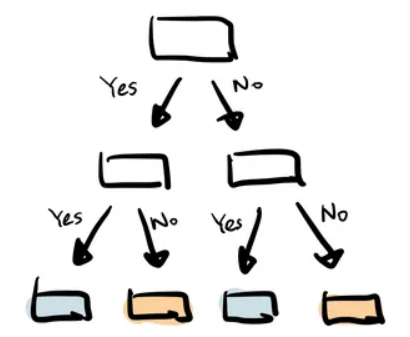

#### 🎄Declare Feature Vector and Target Variable

In [ ]:
df = Df
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [ ]:
# Check the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

#### 🎄Find the Best Test Size

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    DT_Clf = DecisionTreeClassifier (max_depth=3)
    DT_Clf.fit (X_train1, y_train1)
    score.append (DT_Clf.score (X_test1, y_test1))

# Create a dataframe to display the results 
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

<div style="background-color:#e9f5f0; padding:10px; font-size:15px">

We consider the test size **0.25** for **Decision Tree** modeling. 

#### 🎄Train Test Split

In [ ]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, stratify=y, test_size = 0.25, random_state = 0)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

#### 🎄Train Decision Tree Model

In [ ]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training set
DT_model.fit(X_train1, y_train1)

#### 🎄Predict X-test

In [ ]:
y_pred = DT_model.predict(X_test1)

#### 🎄Check Accuracy Score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

#### 🎄Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

#### 🎄K-Fold Cross-validation

In [ ]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [ ]:
score = cross_val_score(DT_model, X_train1, y_train1, cv=kf, scoring='accuracy')
DT_model_cv_score = score.mean()
DT_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

In [ ]:
Accuracy  = ['Cross Validation Accuracy ']
DT_A = pd.DataFrame({'CV Mean':DT_model_cv_score,'Std':DT_model_cv_stdev},index=Accuracy )
DT_A

#### 🎄Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Decision Tree')
plt.grid(False)

#### 🎄Classification Report

In [ ]:
print(classification_report(y_test1, y_pred))

#### 🎄Performance Metrics

In [ ]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [ ]:
BaseDT_result = metrics_calculator(y_test1, y_pred, 'Base Decision Tree')
BaseDT_result

#### 🎄ROC Curve

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
y_Pred_prob = DT_model.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Plot Tree

In [ ]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_model, feature_names = feature_names, class_names = target_names, filled = True)

#### 🎄Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = DT_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune Decision Tree Hyperparameters Using GridSearchCV</p>

In [ ]:
# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = DecisionTreeClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters
max_depth = range(2, 19, 1)
criterion = ['entropy', 'gini']   

#min_samples_split = [2, 3, 4]
#min_samples_leaf = [1, 2, 3]

param_grid = {'max_depth': max_depth, 'criterion':criterion}

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
DT_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

### Tuned Decision Tree Model Evaluation

#### 🎄Train Tuned Model

In [ ]:
DT_modelcv.fit(X_train1, y_train1)

#### 🎄Predict Tuned Model X-test

In [ ]:
y_pred = DT_modelcv.predict(X_test1)

#### 🎄Check Tuned Model Accuracy Score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

#### 🎄Tuned Model Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Decision Tree')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [ ]:
print(classification_report(y_test1, y_pred))

#### 🎄Tuned Model Performance Metrics

In [ ]:
TunedDT_result = metrics_calculator(y_test1, y_pred, 'Tuned Decision Tree')
TunedDT_result

#### 🎄ROC Curve

In [ ]:
y_Pred_prob = DT_modelcv.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Plot Tree

In [ ]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_modelcv, feature_names = feature_names, class_names = target_names, filled = True)

#### 🎄Tuned Model Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = DT_modelcv.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Cost Complexity Pruning</p>

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Generate the cost complexity pruning path for the decision tree using the training data
path = clf.cost_complexity_pruning_path(X_train1, y_train1)

# Extract the list of alphas and impurities from the pruning path
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [ ]:
# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the total impurity vs. effective alpha using a step plot
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', color='#559d96', drawstyle="steps-post")

# Set the x and y labels and title for the plot
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs. Effective alpha for training set")

# Show the plot
plt.show()

In [ ]:
# Initialize empty lists to store classifier objects and evaluation metrics
clfs = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

# Loop through the values of ccp_alpha
for ccp_alpha in ccp_alphas:
    # Create a decision tree classifier object with the given value of ccp_alpha
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    
    # Fit the classifier to the training data
    clf.fit(X_train1, y_train1)
    
    # Generate predictions for the training and test sets
    y_train_pred = clf.predict(X_train1)
    y_test_pred = clf.predict(X_test1)
    
    # Compute and store the accuracy scores for the training and test sets
    accuracy_train.append(clf.score(X_train1, y_train1))
    accuracy_test.append(clf.score(X_test1, y_test1))
    
    # Compute and store the recall scores for the training and test sets
    recall_train.append(metrics.recall_score(y_train1, y_train_pred, average='micro'))
    recall_test.append(metrics.recall_score(y_test1, y_test_pred, average='micro'))
    
    # Store the classifier object in the list of classifiers
    clfs.append(clf)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Set the x-axis and y-axis label to "alpha" and "Recall"
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")

# Set the title of the plot
ax.set_title("Recall vs. alpha for training and testing sets")

# Plot the recall scores for the training and test set as a function of ccp_alpha
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post", color='#559d96')
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post", color='#db735e')

# legend
ax.legend()
plt.show()

#### 🎄Train Pruning  Model

In [ ]:
DT_Pruning = DecisionTreeClassifier(ccp_alpha= 0.0027, criterion= 'entropy', max_depth= 10)
DT_Pruning.fit(X_train1, y_train1)

#### 🎄Predict X-test

In [ ]:
y_pred = DT_Pruning.predict(X_test1)

#### 🎄Pruned Model Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Pruning Decision Tree')
plt.grid(False)

#### 🎄Pruned Model Performance Metrics

In [ ]:
DT_Pruning_result = metrics_calculator(y_test1, y_pred, 'Post-pruning Decision Tree')
DT_Pruning_result

#### 🎄ROC Curve

In [ ]:
y_Pred_prob = DT_Pruning.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Tuned Model Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = DT_Pruning.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ6.2. Random Forestㅤ</span>

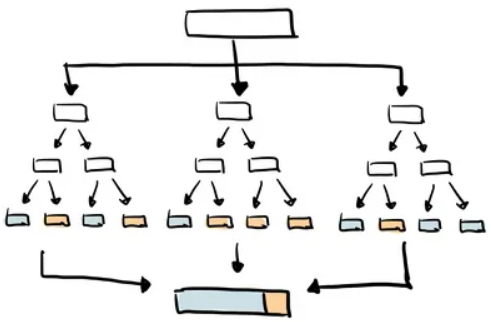

#### 🎄X and y Arrays

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range'].values.ravel()

In [ ]:
print ('X:', X.shape,'\ny:', y.shape)

#### 🎄Find the Best Test Size

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Initialize a list where we'll store the score of each test size
score = []
for size in test_size:
    X_train2, X_test2, y_train2, y_test2 = train_test_split (X, y, test_size=size, random_state=0)
    RF_model = RandomForestClassifier ()
    RF_model.fit (X_train2, y_train2)
    score.append (RF_model.score (X_test2, y_test2))
    
# Create a dataframe to display the results   
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

#### 🎄Train Test Split

In [ ]:
# Split X and y into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 0)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train2.shape)
print('X_test shape:', X_test2.shape)
print('y_train shape:', y_train2.shape)
print('y_test shape:', y_test2.shape)

#### 🎄Train Random Forest Model

In [ ]:
# Instantiate the model
RF_model = RandomForestClassifier()

# Fit the model to the training set
RF_model.fit(X_train2, y_train2)

#### 🎄Predict X-test

In [ ]:
y_pred = RF_model.predict(X_test2)

#### 🎄Check Accuracy Score

In [ ]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

#### 🎄Check for Overfitting and Underfitting

In [ ]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(RF_model.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(RF_model.score(X_test2, y_test2)))

#### 🎄K-Fold Cross-validation

In [ ]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [ ]:
score = cross_val_score(RF_model, X_train2, y_train2, cv=kf, scoring='accuracy')
RF_model_cv_score = score.mean()
RF_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

In [ ]:
Accuracy = ['Cross Validation Accuracy']
RF_A = pd.DataFrame({'CV Mean':RF_model_cv_score,'Std':RF_model_cv_stdev},index=Accuracy)
RF_A

#### 🎄Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Random Forest')
plt.grid(False)

#### 🎄Classification Report

In [ ]:
print(classification_report(y_test2, y_pred))

#### 🎄Performance Metrics

In [ ]:
BaseRF_result = metrics_calculator(y_test2, y_pred, 'Base Random Forest')
BaseRF_result

#### 🎄ROC Curve

In [ ]:
y_Pred_prob = RF_model.predict_proba(X_test2)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test2, y_Pred_prob)

#### 🎄Plot Forest

In [ ]:
# Get the feature names and class names
fn = X.columns
cn = ["0", "1", "2", "3"]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), dpi=900)

# Loop over the two estimators and plot the decision trees
for index in range(0, 2): # for example (2 Estimators)
    tree.plot_tree(RF_model.estimators_[index], feature_names = fn, class_names=cn, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
# Add overall title to the figure
fig.suptitle("Decision Trees of Random Forest Estimators", fontsize=14)
plt.show()

#### 🎄Random Forest Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = RF_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune Random Forest Hyperparameters Using GridSearchCV</p>

In [ ]:
# Finding optimal hyperparameters(GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define model
model = RandomForestClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters   
n_estimators = [10, 50, 100, 200, 500]
max_depth = [None, 3, 4, 8, 9, 10, 11, 12]
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']

#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]

param_grid = {"n_estimators": n_estimators, "max_depth": max_depth, "criterion" : criterion, "max_features" : max_features} 

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
RF_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

### Tuned Random Forest Model Evaluation

#### 🎄Train Tuned  Model

In [ ]:
RF_modelcv.fit(X_train2, y_train2)

#### 🎄Predict Tuned Model X-test

In [ ]:
y_pred = RF_modelcv.predict(X_test2)

#### 🎄Check Tuned Model Accuracy Score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

#### 🎄Tuned Model Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_modelcv, X_test2, y_test2, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Random Forest')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [ ]:
print(classification_report(y_test2, y_pred))

#### 🎄Tuned Model Performance Metrics

In [ ]:
TunedRF_result = metrics_calculator(y_test2, y_pred, 'Tuned Random Forest')
TunedRF_result

#### 🎄ROC Curve

In [ ]:
y_Pred_prob = RF_modelcv.predict_proba(X_test2)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test2, y_Pred_prob)

#### 🎄Plot Forest

In [ ]:
# Get the feature names and class names
fn = X.columns
cn = ["0", "1", "2", "3"]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), dpi=900)

# Loop over the two estimators and plot the decision trees
for index in range(0, 2): # for example (2 Estimators)
    tree.plot_tree(RF_modelcv.estimators_[index], feature_names = fn, class_names=cn, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
# Add overall title to the figure
fig.suptitle("Decision Trees of Random Forest Estimators", fontsize=14)
plt.show()

#### 🎄Tuned Model Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = RF_modelcv.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ6.3. Support Vector Machine (SVM)ㅤ</span>

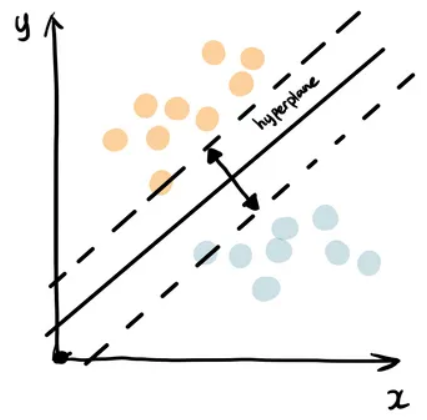

#### 🎄X and y Arrays

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range'].ravel()

In [ ]:
print ('X:', X.shape,'\ny:', y.shape)

#### 🎄Find the Best Test Size

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Initialize a list where we'll store the score of each test size
score = []
for size in test_size:
    X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, test_size=size, random_state=0)
    svm_model = svm.SVC()
    svm_model.fit (X_train3, y_train3)
    score.append (svm_model.score (X_test3, y_test3))
    
# Create a dataframe to display the results   
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

#### 🎄Train Test Split

In [ ]:
# Split X and y into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.2 , random_state = 0)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train3.shape)
print('X_test shape:', X_test3.shape)
print('y_train shape:', y_train3.shape)
print('y_test shape:', y_test3.shape)

#### 🎄Feature Scaling

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train3 = scaler.fit_transform(X_train3)

# Transform the test data using the same scaler
X_test3 = scaler.transform(X_test3)

#### 🎄Train SVM Model

In [ ]:
# Instantiate the model
svm_model = svm.SVC(probability=True)

# Fit the model to the training set
svm_model.fit(X_train3, y_train3)

#### 🎄Predict X-test

In [ ]:
y_pred = svm_model.predict(X_test3)

#### 🎄Check Accuracy Score

In [ ]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

#### 🎄Check for Overfitting and Underfitting

In [ ]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(svm_model.score(X_train3, y_train3)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test3, y_test3)))

#### 🎄K-Fold Cross-validation

In [ ]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [ ]:
score = cross_val_score(svm_model, X_train3, y_train3, cv=kf, scoring='accuracy')
svm_model_cv_score = score.mean()
svm_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

In [ ]:
Accuracy = ['Cross Validation Accuracy']
svm_A = pd.DataFrame({'CV Mean':svm_model_cv_score,'Std':svm_model_cv_stdev},index=Accuracy)
svm_A

#### 🎄Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base SVM')
plt.grid(False)

#### 🎄Classification Report

In [ ]:
print(classification_report(y_test3, y_pred))

#### 🎄Performance Metrics

In [ ]:
BaseSVM_result = metrics_calculator(y_test3, y_pred, 'Base SVM')
BaseSVM_result

#### 🎄Roc Curve

In [ ]:
y_Pred_prob = svm_model.predict_proba(X_test3)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test3, y_Pred_prob)

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune SVM Hyperparameters Using GridSearchCV</p>

In [ ]:
# Finding optimal hyperparameters(GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define model
model = svm.SVC(probability=True)

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters   
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

#degree = [2, 3, 4]
#coef0 = [0, 1, 2]

param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma} 

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train3, y_train3)

# Set the clf to the best combination of parameters
svm_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

### Tuned SVM Model Evaluation

#### 🎄Train Tuned  Model

In [ ]:
svm_modelcv.fit(X_train3, y_train3)

#### 🎄Predict Tuned Model X-test

In [ ]:
y_pred = svm_modelcv.predict(X_test3)

#### 🎄Check Tuned Model Accuracy Score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

#### 🎄Tuned Model Confusion Matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_modelcv, X_test3, y_test3, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned SVM')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [ ]:
print(classification_report(y_test3, y_pred))

#### 🎄Tuned Model Performance Metrics

In [ ]:
TunedSVM_result = metrics_calculator(y_test3, y_pred, 'Tuned SVM')
TunedSVM_result

#### 🎄Roc Curve

In [ ]:
y_Pred_prob = svm_modelcv.predict_proba(X_test3)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test3, y_Pred_prob)

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">7. Conclusion</p>

#### 🎄Test Size Used for each Models

|               | Base Decision Tree | Tuned Decision Tree | Post-pruning Decision Tree | Base Random Forest | Tuned Random Forest | Base SVM | Tuned SVM |
| ------------- | ------------- | -------------- | ---------------------- | -------- | --------- | -------- | --------- |
| **Test Size** |      0.25      |       0.25      |          0.25           |   0.25   |    0.25   |    0.2  |    0.2   |

#### 🎄Comparison Performance Metrics of different Classification Models

In [ ]:
Conclusion = pd.concat([BaseDT_result, TunedDT_result, DT_Pruning_result, BaseRF_result, TunedRF_result, BaseSVM_result, TunedSVM_result], axis=1)
Conclusion

#### 🎄Comparison Confusion Matrix of different Classification Models

In [ ]:
# Create subplots with 2 rows and 4 columns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Plot confusion matrix for Base Decision Tree
ax = axs[0, 0]
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned Decision Tree
ax = axs[0, 1]
disp = ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Pruning Decision Tree
ax = axs[0, 2]
disp = ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Pruning Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Base Random Forest
ax = axs[0, 3]
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base Random Forest')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned Random Forest
ax = axs[1, 0]
disp = ConfusionMatrixDisplay.from_estimator(RF_modelcv, X_test2, y_test2, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned Random Forest')
disp.ax_.grid(False)

# Plot confusion matrix for Base SVM
ax = axs[1, 1]
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base SVM')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned SVM
ax = axs[1, 2]
disp = ConfusionMatrixDisplay.from_estimator(svm_modelcv, X_test3, y_test3, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned SVM')
disp.ax_.grid(False)

# Hide the last subplot
axs[1, 3].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#c27849;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤPredicting NEW Samplesㅤ</span>

In [ ]:
Df_test.head()

#### 🎄Feature Scaling on test data

In [ ]:
# assign the column names of the original DataFrame to the cols variable
cols = Df_test.columns

In [ ]:
# create an instance of the StandardScaler
scaler_test = StandardScaler()

# fit the scaler to the test data and transform it
scaled_test = scaler_test.fit_transform(Df_test)

In [ ]:
# create a DataFrame from the scaled features of the test dataset
scaled_test = pd.DataFrame(scaled_test, columns=[cols])

In [ ]:
scaled_test.head()

#### 🎄Predict Price range

In [ ]:
# Predict Price range based on Tuned SVM Model which was the best Model
predicted_price_range = svm_modelcv.predict(scaled_test)

In [ ]:
# Create a new dataframe for the predicted price range
predicted_df = pd.DataFrame({'predicted_price_range': predicted_price_range})
predicted_df

In [ ]:
new_samples = Df_test.copy()

In [ ]:
# Add predicted price range to new_samples DataFrame
new_samples['pred_price_range'] = predicted_price_range
new_samples.head(10).style.set_properties(**{'background-color': '#7fc5ba'}, subset=['pred_price_range'])

In [ ]:
# Mapping of price range values to names
price_range_map = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost',
}

# Add a new column with mapped price ranges
new_samples['pred_price_range_name'] = new_samples['pred_price_range'].map(price_range_map)

# Display the updated dataframe
new_samples.tail(10).style.set_properties(**{'background-color': '#7fc5ba'}, subset=['pred_price_range_name'])

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">8. Ensemble Learning</p>

### 🎄Data Preparation

#### 🎄X and y Arrays

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [ ]:
print ('X:', X.shape,'\ny:', y.shape)

#### 🎄Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.2 , random_state = 0)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

#### 🎄Feature Scaling

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.1. Voting Classifierㅤ</span>

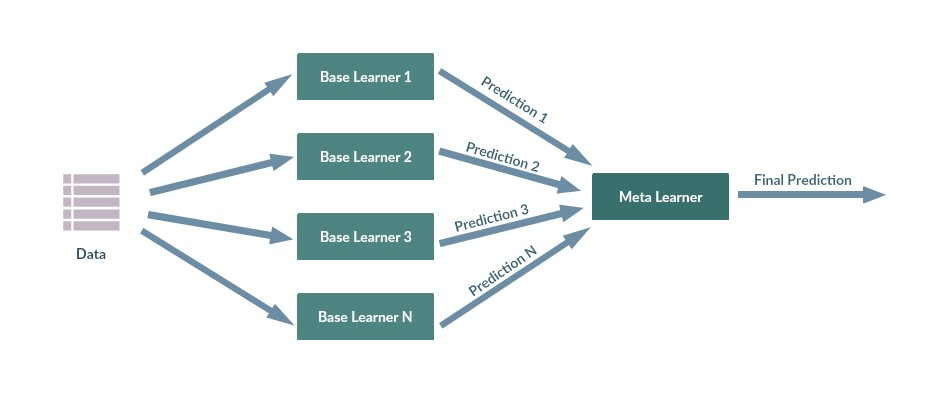

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Base Voting Classifier</p>

In [ ]:
# define the models to include in the ensemble
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier(max_depth=3)
svm_model = SVC(probability=True)

# create the ensemble model and fit it on the training set
ensemble_model = VotingClassifier(estimators=[('RF', rf_model), ('DT', dt_model), ('SVM', svm_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions1 = ensemble_model.predict(X_test)
accuracy = metrics.accuracy_score(predictions1, y_test)
print('Accuracy of the Ensemble Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the ensemble model
cross_val_scores = cross_val_score(ensemble_model, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Ensemble Model:', cross_val_scores.mean())

#### 🎄Performance Metrics for Base Voting Classifier Model

In [ ]:
BaseVoting_Classifier_result = metrics_calculator(y_test, predictions1, 'Base Voting Classifier')
BaseVoting_Classifier_result

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tuned Voting Classifier</p>

In [ ]:
# define the models to include in the ensemble
rf_model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=500)
dt_model = DecisionTreeClassifier(ccp_alpha=0.0027, criterion='entropy', max_depth=7)
svm_model = SVC(C=10, kernel='linear', probability=True)

# create the ensemble model and fit it on the training set
ensemble_model1 = VotingClassifier(estimators=[('RF', rf_model), ('DT', dt_model), ('SVM', svm_model)], voting='soft')
ensemble_model1.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions2 = ensemble_model1.predict(X_test)
accuracy = metrics.accuracy_score(predictions2, y_test)
print('Accuracy of the Ensemble Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the ensemble model
cross_val_scores = cross_val_score(ensemble_model1, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Ensemble Model:', cross_val_scores.mean())

#### 🎄Performance Metrics for Tuned Voting Classifier Model

In [ ]:
TunedVoting_Classifier_result = metrics_calculator(y_test, predictions2, 'Tuned Voting Classifier')
TunedVoting_Classifier_result

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.2 Bagging (Bagged Decision Tree)ㅤ</span>

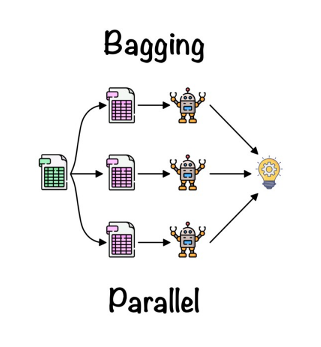

#### 🎄Tuned Bagged Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the base decision tree model and the bagging model
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_model, random_state=0)

# create a dictionary of hyperparameters to search over
param_grid = {'base_estimator__max_depth': [4, 6],
              'base_estimator__min_samples_split': [4, 6],
              'n_estimators': [50, 100],
              'max_samples': [0.7, 1.0]}

# use GridSearchCV to search over the hyperparameter space
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Bagging = grid_search.best_estimator_

# print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

#### 🎄Train Tuned  Model

In [ ]:
# fit the bagging model on the training set
Bagging.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions3 = Bagging.predict(X_test)
accuracy = metrics.accuracy_score(predictions3, y_test)
print('Accuracy of the Bagged Decision Tree Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the bagging model
cross_val_scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagged Decision Tree Model:', cross_val_scores.mean())

#### 🎄Performance Metrics for Tuned Bagged Decision Tree Model

In [ ]:
Bagged_DecisionTree_result = metrics_calculator(y_test, predictions3, 'Tuned Bagged Decision Tree')
Bagged_DecisionTree_result

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.3. Boosting (AdaBoost, Gradient Boosting & XGBoost)ㅤ</span>

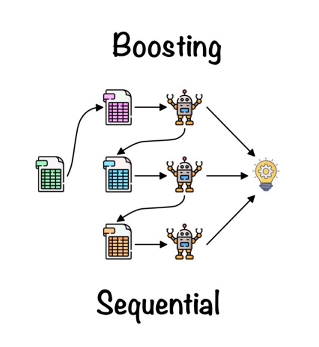

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.3.1. AdaBoost (Adaptive Boosting)ㅤ</span>

#### 🎄Tuned AdaBoost (Adaptive Boosting)

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the AdaBoost model with default hyperparameters
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# define the hyperparameters to tune
params = {'n_estimators': [200, 500, 900], 'learning_rate': [0.1, 0.01, 1]}

# base_estimator__max_depth = [1, 2, 3, 4, 5]

# define the grid search using cross validation
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AdaBoost = grid_search.best_estimator_

# print the best hyperparameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)

#### 🎄Train Tuned  Model

In [ ]:
# fit the AdaBoost model on the training set
AdaBoost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions4 = AdaBoost.predict(X_test)
accuracy = metrics.accuracy_score(predictions4, y_test)
print('Accuracy of the AdaBoost on the test set:', accuracy)

# calculate and print the mean cross-validated score of the AdaBoost model
cross_val_scores = cross_val_score(AdaBoost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for AdaBoost is:', cross_val_scores.mean())

#### 🎄Performance Metrics for Tuned AdaBoost Model

In [ ]:
AdaBoost_result = metrics_calculator(y_test, predictions4, 'Tuned AdaBoost')
AdaBoost_result

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.3.2. Stochastic Gradient Boostingㅤ</span>

#### 🎄Tuned Stochastic Gradient Boosting

In [ ]:
# Define the GradientBoosting model with default hyperparameters
grad = GradientBoostingClassifier(learning_rate=0.1, random_state=0)

# Define the hyperparameters to tune
parameters = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]

# Create the grid search object
grid_search = GridSearchCV(grad, parameters, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Gradient_Boosting = grid_search.best_estimator_

# Print the results
print('Best parameters:', grid_search.best_params_)

#### 🎄Train Tuned  Model

In [ ]:
# fit the GradientBoosting model on the training set
Gradient_Boosting.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions5 = Gradient_Boosting.predict(X_test)
accuracy = metrics.accuracy_score(predictions5, y_test)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the GradientBoosting model
cross_val_scores = cross_val_score(Gradient_Boosting, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

#### 🎄Performance Metrics for Tuned Gradient Boosting Model

In [ ]:
GradientBoosting_result = metrics_calculator(y_test, predictions5, 'Tuned Gradient Boosting')
GradientBoosting_result

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ8.3.3. XGBoostㅤ</span>

#### 🎄Tuned XGBoost

In [ ]:
# Create XGBoost classifier
xgboost = xg.XGBClassifier(objective='multi:softmax', learning_rate=0.1)

# Set hyperparameters to tune
param_grid = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#subsample = [0.6, 0.8, 1.0]
#colsample_bytree = [0.6, 0.8, 1.0]
#gamma = [0, 1, 5]

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=10)

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Xgboost = grid_search.best_estimator_

# Print results
print('The best hyperparameters are:', grid_search.best_params_)

#### 🎄Train Tuned  Model

In [ ]:
# fit the XGBoost model on the training set
Xgboost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions6 = Xgboost.predict(X_test)
accuracy = metrics.accuracy_score(predictions6, y_test)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the XGBoost model
cross_val_scores = cross_val_score(Xgboost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

#### 🎄Performance Metrics for Tuned XGBoost Model

In [ ]:
XGBoost_result = metrics_calculator(y_test, predictions6, 'Tuned XGBoost')
XGBoost_result

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#c27849;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤConclusion of Ensembled Modelsㅤ</span>

In [ ]:
Ensemble_Conclusion = pd.concat([BaseVoting_Classifier_result, TunedVoting_Classifier_result, Bagged_DecisionTree_result, AdaBoost_result, GradientBoosting_result, XGBoost_result], axis=1)
Ensemble_Conclusion

|       | **Model (Best from 1 to 6)** |
| :---  |   :---   |       
| **1** | Tuned Voting Classifier✅ |                 
| **2** | Tuned XGBoost |                         
| **3** | Tuned Gradient Boosting |
| **4** | Base Voting Classifier |
| **5** | Tuned Bagged DecisionTree |                        
| **6** | Tuned AdaBoost |                      

### Evaluation of Best Ensembled Model

#### 🎄Predict Best Ensembled Model X-test

In [ ]:
# Tuned Voting Classifier
y_pred_tuned_ensemble = ensemble_model1.predict(X_test)

#### 🎄Confusion Matrix for the Best Model of Ensemble Learning

In [ ]:
# Tuned Voting Classifier
ConfusionMatrixDisplay.from_estimator(ensemble_model1, X_test, y_test, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Best Ensembled Model')
plt.grid(False)

#### 🎄Classification Report for the Best Model of Ensemble Learning

In [ ]:
# Tuned Voting Classifier
print(classification_report(y_test, y_pred_tuned_ensemble))

#### 🎄Roc Curve for the Best Model of Ensemble Learning

In [ ]:
# Tuned Voting Classifier
y_Pred_prob = ensemble_model1.predict_proba(X_test)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test, y_Pred_prob)